In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas
import sklearn
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
!pip install pydotplus
import pydotplus

     |████████████████████████████████| 278 kB 537 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=64914de1c98f90993dece292d12f13d880a48021a40f6b11a0cc8aabec03b63a
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [2]:
# open data
winequalityredcsv_data = pandas.read_csv('../input/winequalityredcsv/winequality-red.csv', header=0)

#visualize
winequalityredcsv_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
predictors = winequalityredcsv_data.drop(['quality'],axis=1) # Features
target = winequalityredcsv_data['quality'] # Target variable

In [4]:
# from to class names
winequalityredcsv_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
predictors_teach, predictors_test, target_teach, target_test = sklearn.model_selection.train_test_split(predictors, target, test_size=0.3, random_state=1) # 70% training and 30% test

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion="gini",min_impurity_decrease=0.02,max_depth=4 ,min_samples_leaf=20)

decision_tree = decision_tree.fit(predictors_teach, target_teach)

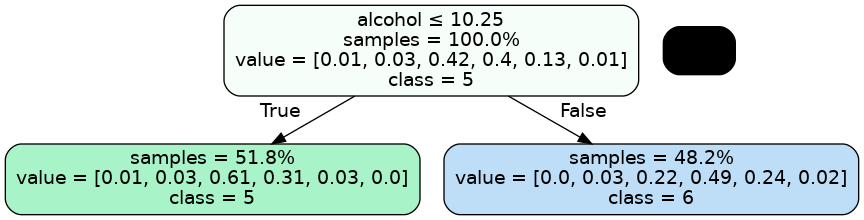

In [6]:
dot_data = StringIO()

export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,impurity=False, proportion=True,precision=2,
                special_characters=True, feature_names=predictors.columns, class_names=['3','4','5','6','7','8']) #["really bad","bad","ok","good","really good"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [7]:
#confusion matrix
prediction = decision_tree.predict(predictors_test)

from sklearn import metrics

accuracy = metrics.accuracy_score(target_test, prediction)

print("accuracy_score:",accuracy)

accuracy_score: 0.5791666666666667


In [8]:
len(prediction)

confusion_matrix = metrics.confusion_matrix(target_test, prediction)

print(confusion_matrix)

[[  0   0   1   1   0   0]
 [  0   0  11  10   0   0]
 [  0   0 164  43   0   0]
 [  0   0  81 114   0   0]
 [  0   0   5  47   0   0]
 [  0   0   0   3   0   0]]


In [13]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    
    # plt.cm.Oranges .. eli muitakin varivaihtoehtoja loytyy
 #   This function prints and plots the confusion matrix.
 #   Normalization can be applied by setting `normalize=True`.
 #   Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
        # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Truth', size = 18)
    plt.xlabel('Prediction', size = 18)

In [ ]:
    # visual confusion matrix
cm = confusion_matrix(target_test, prediction)
plot_confusion_matrix(cm, classes = ['3','4','5','6','7','8'],
                      normalize = False,
                      title = 'Confusion Matrix')